In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, truncnorm, uniform
import oct2py
oc = oct2py.Oct2Py()


project: look at black box C.I.'s and compare them to valid confidence invervals to see if they are valid. If they are valid, they should behave like the known ones from class. Make testing procedures with N, and alphas values. 

Functions take in a sample array and what function you are using

## Known Confidence Intervals

In [2]:
def get_sample(function, N, **kwargs):
    return function.rvs(size=N, **kwargs)

def get_confidence_hoeffding(sample, alpha):
   
    N = len(sample)
    x_bar = np.mean(sample)
    E_N = np.sqrt((1/(2*N))*np.log(2/alpha))

    A_N = x_bar - E_N
    B_N = x_bar + E_N

    return [A_N, B_N]

def get_confidence_guassian(sample, sigma, epsilon):
   
    N = len(sample)
    x_bar = np.mean(sample)
    E_N = (sigma*epsilon)/np.sqrt(N)

    A_N = x_bar - E_N
    B_N = x_bar + E_N

    return [A_N, B_N]

def get_confidence_guassian_no_sigma(sample, epsilon):
    
    N = len(sample)
    x_bar = np.mean(sample)
    E_N = (np.std(sample)*epsilon)/np.sqrt(N)

    A_N = x_bar - E_N
    B_N = x_bar + E_N

    return [A_N, B_N]

In [3]:
epsilon_alpha = {
    0.25: 1.150349,
    0.1: 1.64485,
    0.05: 1.95996,
    0.01: 2.57582
}

In [4]:
sample_function = truncnorm #bernoulli
true_mean = .5
number_samples = 100
sample_sizes = [10,100,1000,10000,100000]

# Define the shape parameters for truncnorm to bound between 0 and 1
a, b = 0, 1  # Truncation bounds (relative to the standard normal distribution)
loc = 0.5    # Center the distribution at 0.5 (mean)
scale = 0.2  # Standard deviation

# Convert the bounds into z-scores
a = (0 - loc) / scale
b = (1 - loc) / scale

# Pass these as kwargs
kwargs = {'a': a, 'b': b, 'loc': loc, 'scale': scale} #{"p":true_mean}

alpha = .05

interval_means = []
for N in sample_sizes:
    intervals = []
    for _ in range(number_samples):
        # Generate sample
        x = get_sample(sample_function, N, **kwargs)
    
        # Compute confidence interval
        lower, upper = get_confidence_hoeffding(x, alpha)
        intervals.append([lower, upper])
    
    # Compute mean of the intervals
    interval_means.append(np.mean(intervals, axis=0))

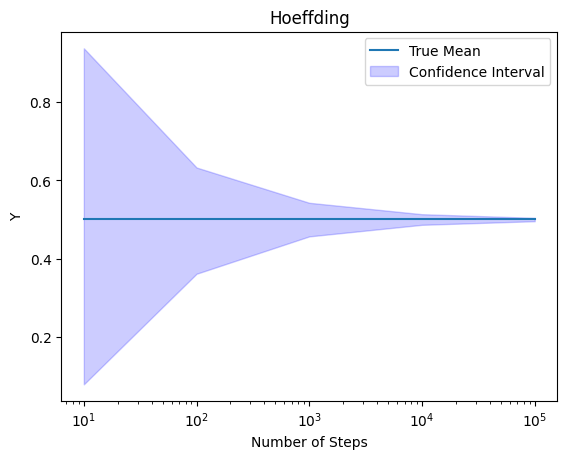

In [5]:
true_means = np.full(len(sample_sizes),true_mean)

lower = np.array(interval_means).T[0]
upper = np.array(interval_means).T[1]

plt.figure()
plt.plot(sample_sizes,true_means, label = "True Mean")
plt.fill_between(sample_sizes, lower, upper, color="blue", alpha=0.2, label="Confidence Interval")
plt.title("Hoeffding")
plt.ylabel("Y")
plt.xlabel("Number of Steps")
plt.xticks(ticks=sample_sizes)
plt.xscale("log")
plt.legend(loc="upper right")

In [ ]:
interval_means = []
for N in sample_sizes:
    intervals = []
    for _ in range(number_samples):
       
        x = get_sample(sample_function, N, **kwargs)
    
        lower, upper = get_confidence_guassian_no_sigma(x, epsilon_alpha[alpha])
        intervals.append([lower, upper])
    
    interval_means.append(np.mean(intervals, axis=0))

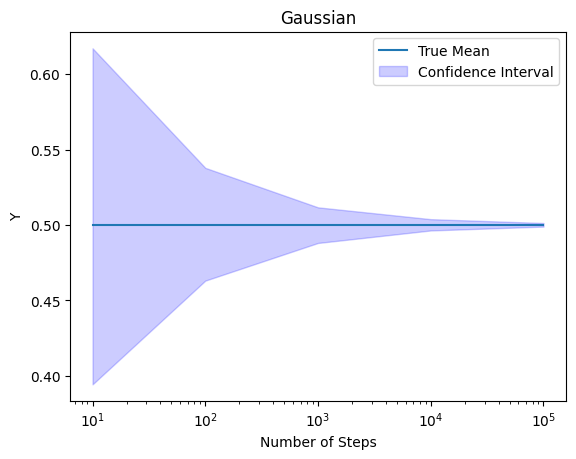

In [7]:
true_means = np.full(len(sample_sizes),true_mean)

lower = np.array(interval_means).T[0]
upper = np.array(interval_means).T[1]

plt.figure()
plt.plot(sample_sizes,true_means, label = "True Mean")
plt.fill_between(sample_sizes, lower, upper, color="blue", alpha=0.2, label="Confidence Interval")
plt.title("Gaussian")
plt.ylabel("Y")
plt.xlabel("Number of Steps")
plt.xticks(ticks=sample_sizes)
plt.xscale("log")
plt.legend(loc="upper right")

## Testing Unkown Confidence Intervals 

In [8]:
def get_sample(function, N, **kwargs):
    return function.rvs(size=N, **kwargs)

def get_unknown_CI(CI_number, sample_function, sample_sizes, number_samples, **kwargs):
    
    interval_means = []
    for N in sample_sizes:
        intervals = []
        for _ in range(number_samples):
            # Generate sample
            x = get_sample(sample_function, N, **kwargs)
        
            # Compute confidence interval
            lower, upper = oc.ci(x, CI_number, nout=2)
            intervals.append([lower, upper])
        
        # Compute mean of the intervals
        interval_means.append(np.mean(intervals, axis=0))
    
    return interval_means

In [9]:

function_CI_means = []
for CI_number in range(1,11):
    interval_means = get_unknown_CI(CI_number, sample_function, sample_sizes, number_samples, **kwargs)
    
    function_CI_means.append(interval_means)

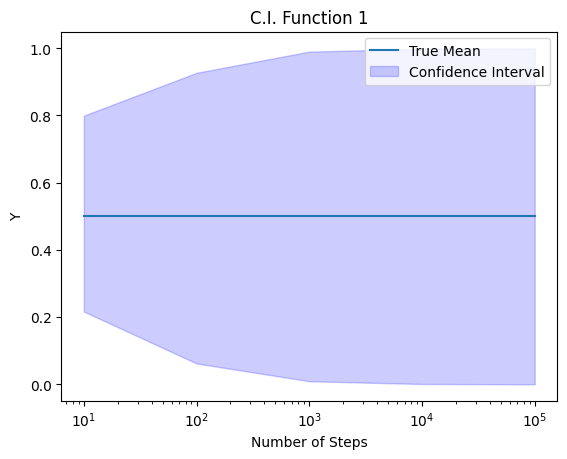

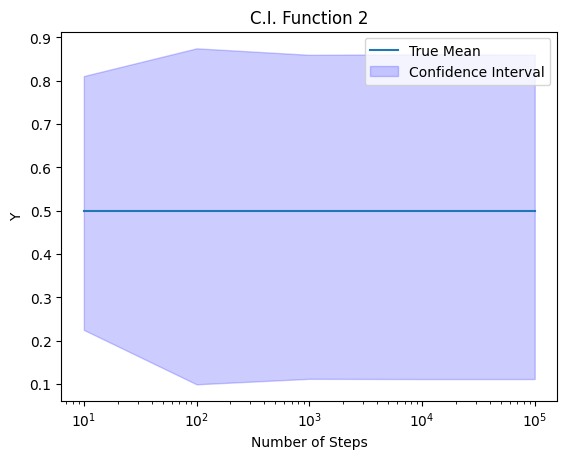

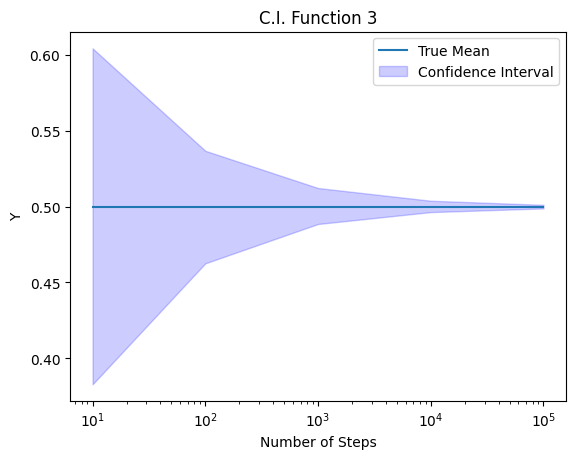

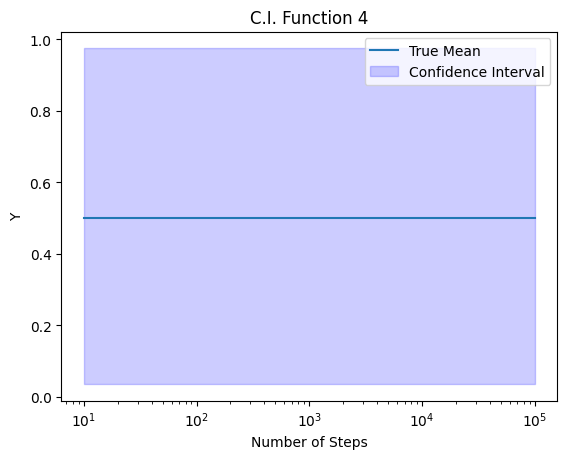

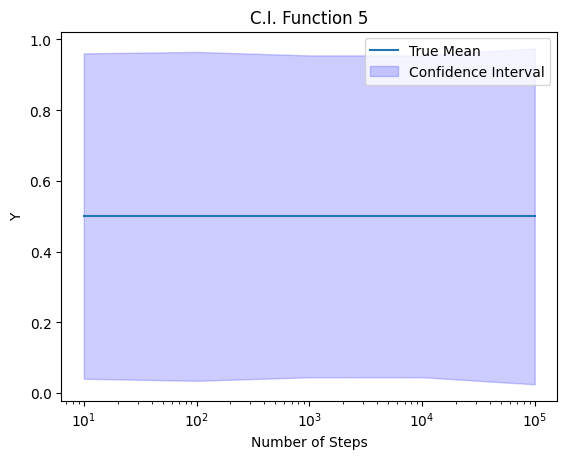

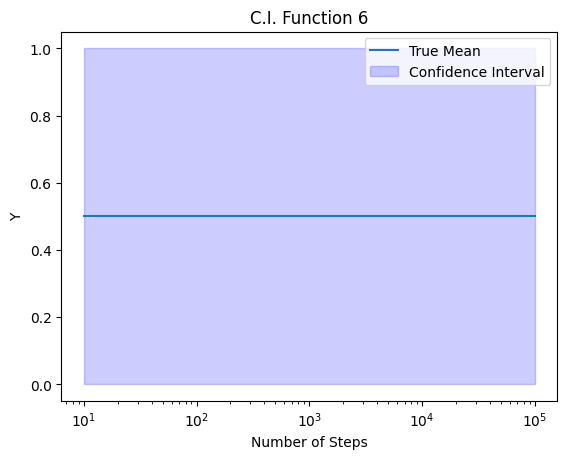

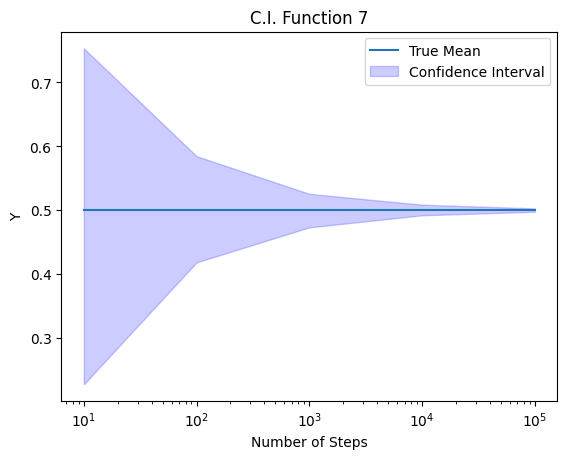

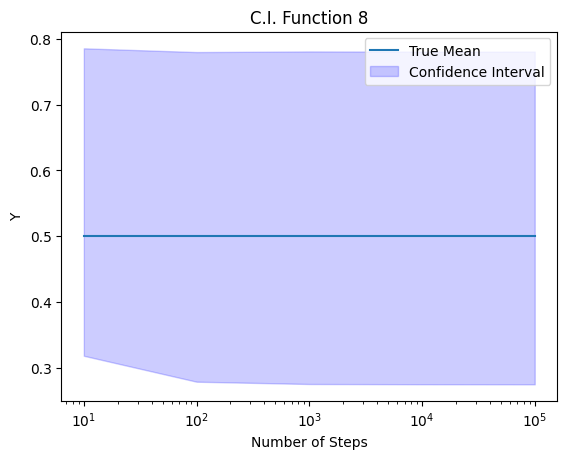

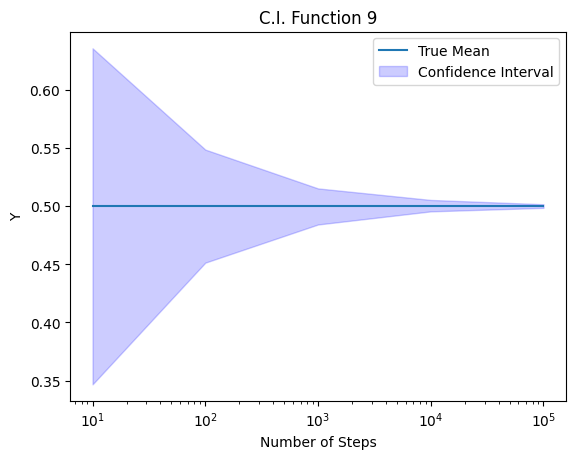

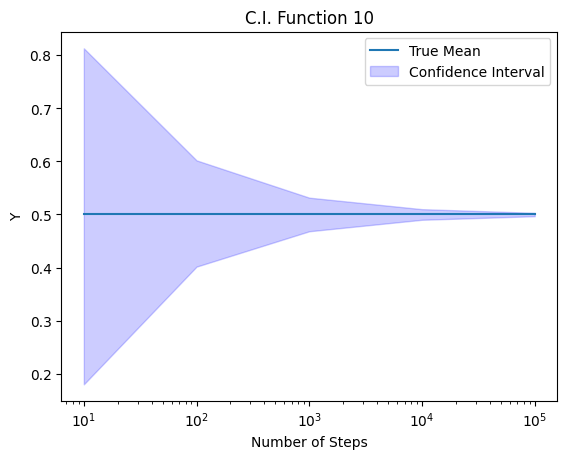

In [10]:
true_means = np.full(len(sample_sizes),true_mean)

figure = 1
for CI_mean in function_CI_means:
    lower = np.array(CI_mean).T[0]
    upper = np.array(CI_mean).T[1]

    plt.figure()
    plt.plot(sample_sizes,true_means, label = "True Mean")
    plt.fill_between(sample_sizes, lower, upper, color="blue", alpha=0.2, label="Confidence Interval")
    plt.title("C.I. Function " + str(figure))
    plt.ylabel("Y")
    plt.xlabel("Number of Steps")
    plt.xticks(ticks=sample_sizes)
    plt.xscale("log")
    plt.legend(loc="upper right")

    figure += 1

## Determine Alpha Values of Valid functions